In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/hedvig/data/input/data.csv", delimiter = ';')
data.head()

,owner_age,owner_gender,geo_zone,vehicle_classification,vehicle_age,duration,n_claims,claim_cost
0,0,M,1,4,12,0.175342,0,0
1,4,M,3,6,9,0.000000,0,0
2,5,K,3,3,18,0.454795,0,0
3,5,K,4,1,25,0.172603,0,0
4,6,K,2,1,26,0.180822,0,0


### Cleaning the Data

Based on the claim cost, I realised 1 1 could be anything (claim group) or (paid unpaid claim)

In [ ]:
def process_n_claims(value):
    if isinstance(value, str):
        return sum(map(int, value.split()))
    return value

data['n_claims'] = data['n_claims'].apply(process_n_claims)
data['n_claims'] = pd.to_numeric(data['n_claims'], errors='coerce')
data['n_claims'].head()

,n_claims
0,0
1,0
2,0
3,0
4,0


4 cases where number of claims were more than 1, but the Policy was not In-Force

In [ ]:
invalid_cases = data[(data['duration'] == 0) & (data['n_claims'] > 0)]

# Set duration to 1 for these invalid cases
data.loc[invalid_cases.index, 'duration'] = 1

# Verify the changes
print("Updated invalid cases:")
print(data.loc[invalid_cases.index])

Updated invalid cases:
       owner_age owner_gender  geo_zone  vehicle_classification  vehicle_age  \
3430          22            M         4                       6            9   
4241          23            M         3                       4           21   
15950         31            M         1                       3           14   
16118         31            M         2                       2            0   

       duration  n_claims  claim_cost  
3430        1.0         1       29329  
4241        1.0         1       12981  
15950       1.0         1       26560  
16118       1.0         1       31900  


Removed all the cases where Policy Duration was 0, that means the policy was not in Force (Issued stated) or could be future effective dated policy

In [ ]:
print(data.shape)
data = data[data['duration'] > 0]
data.shape

(64548, 8)


(62478, 8)

In [ ]:
data = data.drop_duplicates()
data.shape

(61347, 8)

In [ ]:
data['owner_gender'] = data['owner_gender'].map({'M': 1, 'K': 0})
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61347 entries, 0 to 64547
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   owner_age               61347 non-null  int64  
 1   owner_gender            61347 non-null  int64  
 2   geo_zone                61347 non-null  int64  
 3   vehicle_classification  61347 non-null  int64  
 4   vehicle_age             61347 non-null  int64  
 5   duration                61347 non-null  float64
 6   n_claims                61347 non-null  int64  
 7   claim_cost              61347 non-null  int64  
dtypes: float64(1), int64(7)
memory usage: 4.2 MB


Cases where the vehicle age is less than the duration.
Ex : Vehicle is 3 years old, but the duration of the Policy is 5 (Invalid)

In [ ]:
print(data.shape[0])

# Detect anomalies where vehicle_age is less than the floor of duration and n_claims = 0
anomalies = data[(data['vehicle_age'] < np.floor(data['duration'])) & (data['n_claims'] == 0)]

data = data.drop(anomalies.index)

print(data.shape[0])

61347
60396


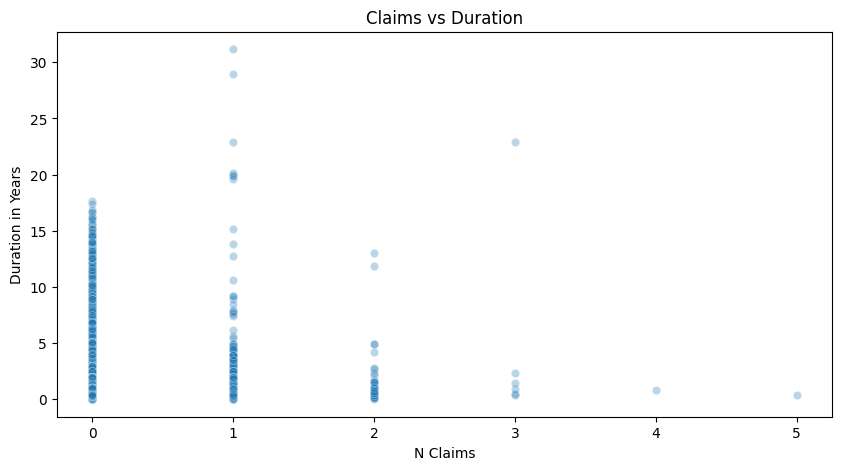

In [ ]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=data['n_claims'], y=data['duration'], alpha=0.3, edgecolor='w')
plt.title("Claims vs Duration")
plt.xlabel("N Claims")
plt.ylabel("Duration in Years")
plt.show()

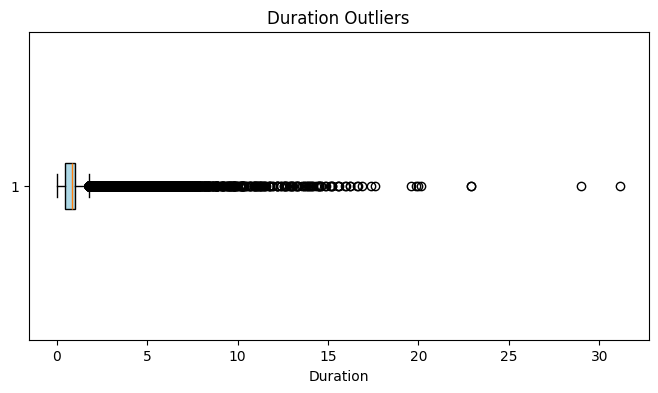

In [ ]:
import matplotlib.pyplot as plt

# Plot a boxplot for the 'duration' column
plt.figure(figsize=(8, 4))
plt.boxplot(data['duration'], vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.title('Duration Outliers')
plt.xlabel('Duration')
plt.show()

In [ ]:
data['claim_frequency'] = data['n_claims'] / data['duration']
data.head()

,owner_age,owner_gender,geo_zone,vehicle_classification,vehicle_age,duration,n_claims,claim_cost,claim_frequency
0,0,1,1,4,12,0.175342,0,0,0.0
2,5,0,3,3,18,0.454795,0,0,0.0
3,5,0,4,1,25,0.172603,0,0,0.0
4,6,0,2,1,26,0.180822,0,0,0.0
5,9,0,3,3,8,0.542466,0,0,0.0


In [ ]:
data.shape

(60396, 9)

In [ ]:
data = data.drop(columns=['n_claims', 'duration', 'claim_cost'])

# Verify the remaining columns
print(data.shape)

(60396, 6)


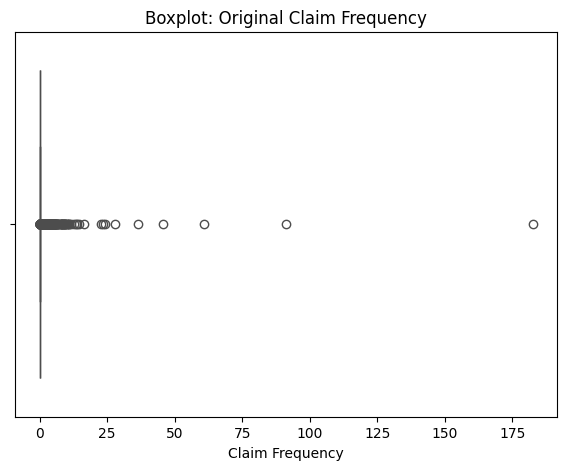

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for the original claim_frequency data
plt.figure(figsize=(7, 5))
sns.boxplot(x=data['claim_frequency'], color='blue')
plt.title('Boxplot: Original Claim Frequency')
plt.xlabel('Claim Frequency')
plt.show()

In [ ]:
data['claim_frequency'].value_counts()

,count
claim_frequency,
0.000000,59726
1.000000,28
1.994535,9
0.500000,7
2.005495,7
...,...
0.588710,1
1.173633,1
8.111089,1


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

data['claim_frequency'] = np.log1p(data['claim_frequency'])  # Log transformation

In [ ]:
data['claim_frequency'].value_counts()

,count
claim_frequency,
0.000000,59726
0.693147,28
1.096789,9
0.405465,7
1.100442,7
...,...
0.462922,1
0.776400,1
2.209492,1


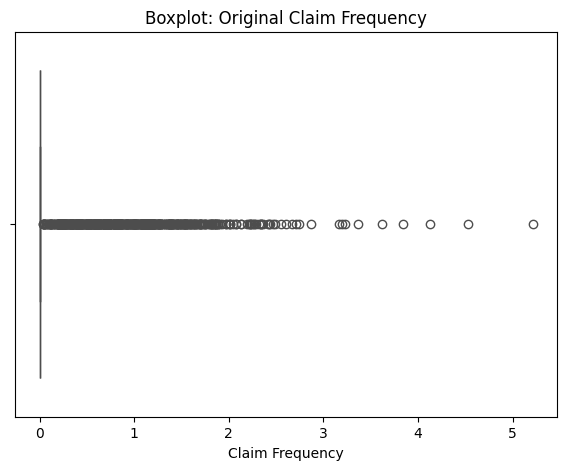

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for the original claim_frequency data
plt.figure(figsize=(7, 5))
sns.boxplot(x=data['claim_frequency'], color='blue')
plt.title('Boxplot: Original Claim Frequency')
plt.xlabel('Claim Frequency')
plt.show()

In [ ]:
data['claim_frequency'].skew()

15.469803151669012

Number of outliers: 36
       owner_age  owner_gender  geo_zone  vehicle_classification  vehicle_age  \
423           17             1         4                       4            1   
550           18             1         1                       4            3   
951           19             1         1                       1            8   
1437          20             1         1                       3           10   
1781          20             1         4                       5            6   
2884          22             1         2                       4            5   
3918          23             1         2                       3            2   
4032          23             1         2                       5           11   
4416          23             1         4                       3            0   
4862          23             1         6                       7            3   
5240          24             1         1                       4            6   
7379 

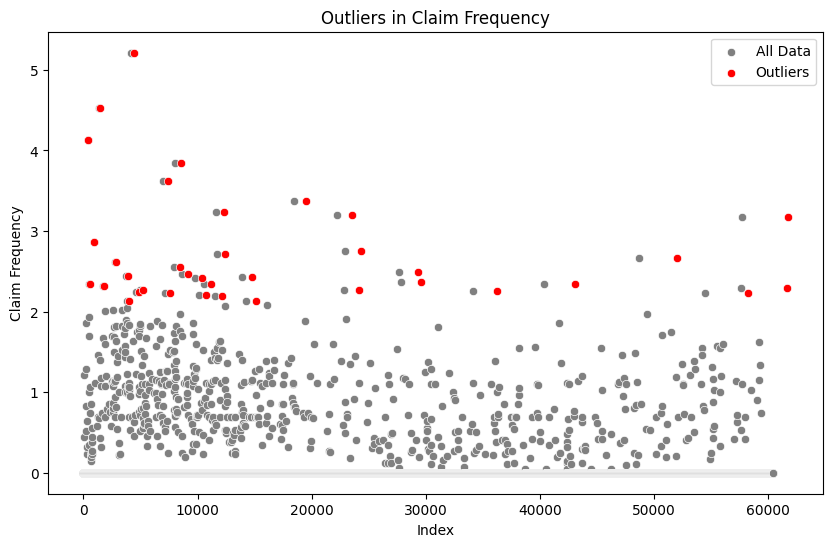

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Highlight the outliers using the IQR method
Q1 = data['claim_frequency'].quantile(0.25)
Q3 = data['claim_frequency'].quantile(0.9945)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers
data_no_outliers = data[(data['claim_frequency'] >= lower_bound) & (data['claim_frequency'] <= upper_bound)]
outliers = data[(data['claim_frequency'] < lower_bound) | (data['claim_frequency'] > upper_bound)]

# Print outliers
print(f"Number of outliers: {outliers.shape[0]}")
print(outliers)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=range(len(data)), y=data['claim_frequency'], color='gray', label='All Data')
sns.scatterplot(x=outliers.index, y=outliers['claim_frequency'], color='red', label='Outliers')
plt.title('Outliers in Claim Frequency')
plt.xlabel('Index')
plt.ylabel('Claim Frequency')
plt.legend()
plt.show()

In [ ]:
data_no_outliers.shape

(60360, 6)

In [ ]:
data_no_outliers['claim_frequency'].skew()

12.782422983285313

In [ ]:
data=data_no_outliers
data.shape

(60360, 6)

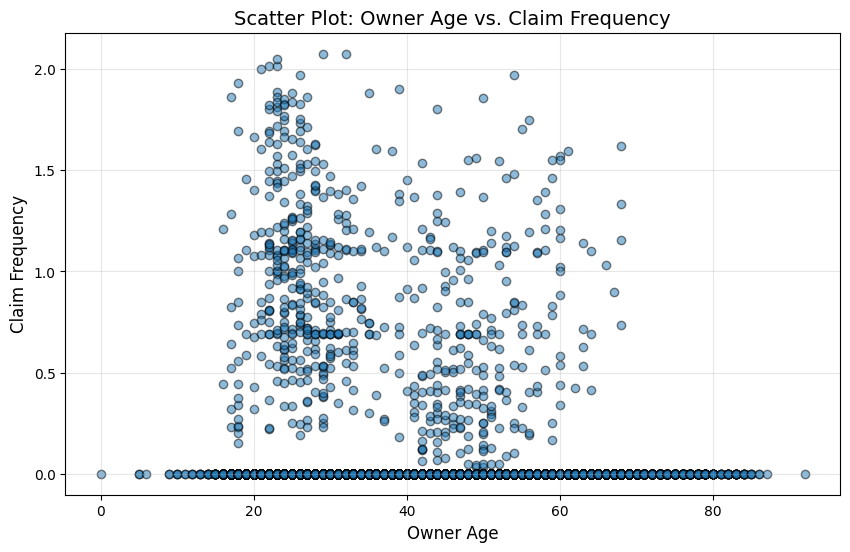

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(data['owner_age'], data['claim_frequency'], alpha=0.5, edgecolor='k')
plt.title("Scatter Plot: Owner Age vs. Claim Frequency", fontsize=14)
plt.xlabel("Owner Age", fontsize=12)
plt.ylabel("Claim Frequency", fontsize=12)
plt.grid(alpha=0.3)
plt.show()


<ipython-input-223-89b2c0088937>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_bin_avg_claims = data.groupby('age_bin')['claim_frequency'].mean()


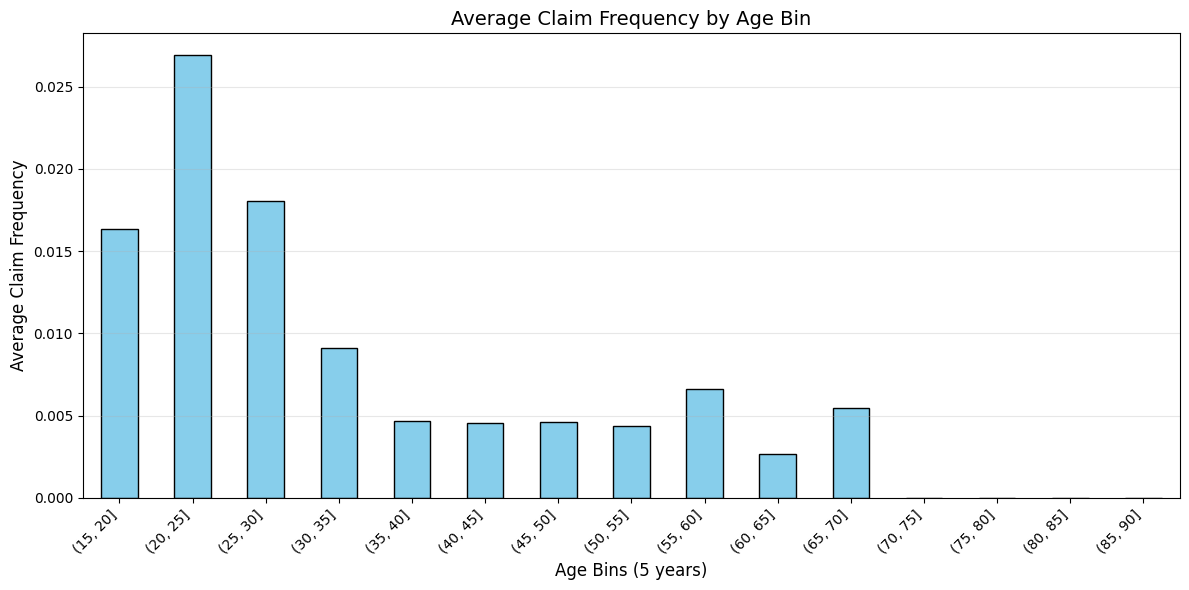

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

data['age_bin'] = pd.cut(data['owner_age'], bins=np.arange(15, 95, 5))

age_bin_avg_claims = data.groupby('age_bin')['claim_frequency'].mean()

plt.figure(figsize=(12, 6))
age_bin_avg_claims.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Average Claim Frequency by Age Bin", fontsize=14)
plt.xlabel("Age Bins (5 years)", fontsize=12)
plt.ylabel("Average Claim Frequency", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


<ipython-input-224-1b8d92fbdc0e>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_bin_avg_claims = data.groupby('age_bin')['claim_frequency'].mean()


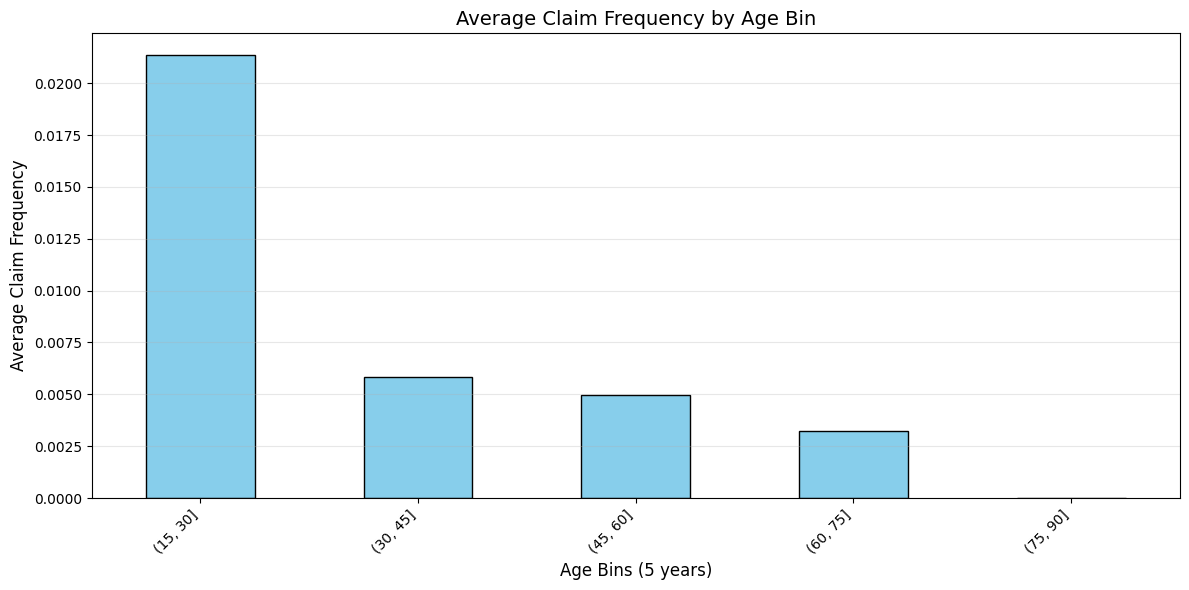

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

data['age_bin'] = pd.cut(data['owner_age'], bins=np.arange(15, 95, 15))

age_bin_avg_claims = data.groupby('age_bin')['claim_frequency'].mean()

plt.figure(figsize=(12, 6))
age_bin_avg_claims.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Average Claim Frequency by Age Bin", fontsize=14)
plt.xlabel("Age Bins (5 years)", fontsize=12)
plt.ylabel("Average Claim Frequency", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


In [ ]:
# Define age bins and labels
bins = [15, 30, 45, 60, 100]
labels = ['young', 'lower_middle', 'upper_middle', 'old']

data['Age_Group'] = pd.cut(data['owner_age'], bins=bins, labels=labels, right=False)
data = pd.get_dummies(data, columns=['Age_Group'], prefix='Age_Is')
data = data.applymap(lambda x: int(x) if isinstance(x, bool) else x)
data.head()

<ipython-input-225-408d96429cde>:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(lambda x: int(x) if isinstance(x, bool) else x)


,owner_age,owner_gender,geo_zone,vehicle_classification,vehicle_age,claim_frequency,age_bin,Age_Is_young,Age_Is_lower_middle,Age_Is_upper_middle,Age_Is_old
0,0,1,1,4,12,0.0,NaN,0,0,0,0
2,5,0,3,3,18,0.0,NaN,0,0,0,0
3,5,0,4,1,25,0.0,NaN,0,0,0,0
4,6,0,2,1,26,0.0,NaN,0,0,0,0
5,9,0,3,3,8,0.0,NaN,0,0,0,0


In [ ]:
data.drop(columns=['age_bin', 'owner_age'], inplace=True)
data.head()

,owner_gender,geo_zone,vehicle_classification,vehicle_age,claim_frequency,Age_Is_young,Age_Is_lower_middle,Age_Is_upper_middle,Age_Is_old
0,1,1,4,12,0.0,0,0,0,0
2,0,3,3,18,0.0,0,0,0,0
3,0,4,1,25,0.0,0,0,0,0
4,0,2,1,26,0.0,0,0,0,0
5,0,3,3,8,0.0,0,0,0,0


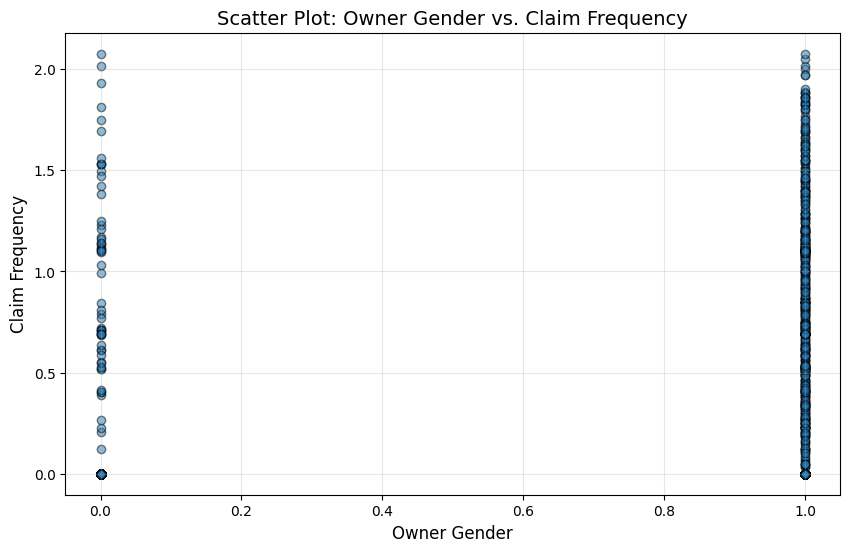

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(data['owner_gender'], data['claim_frequency'], alpha=0.5, edgecolor='k')
plt.title("Scatter Plot: Owner Gender vs. Claim Frequency", fontsize=14)
plt.xlabel("Owner Gender", fontsize=12)
plt.ylabel("Claim Frequency", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

In [ ]:
mean_claim_frequency = data.groupby('owner_gender')['claim_frequency'].mean()

# Display the results
print("Mean claim frequency by owner gender:")
print(mean_claim_frequency)

Mean claim frequency by owner gender:
owner_gender
0    0.006108
1    0.009637
Name: claim_frequency, dtype: float64


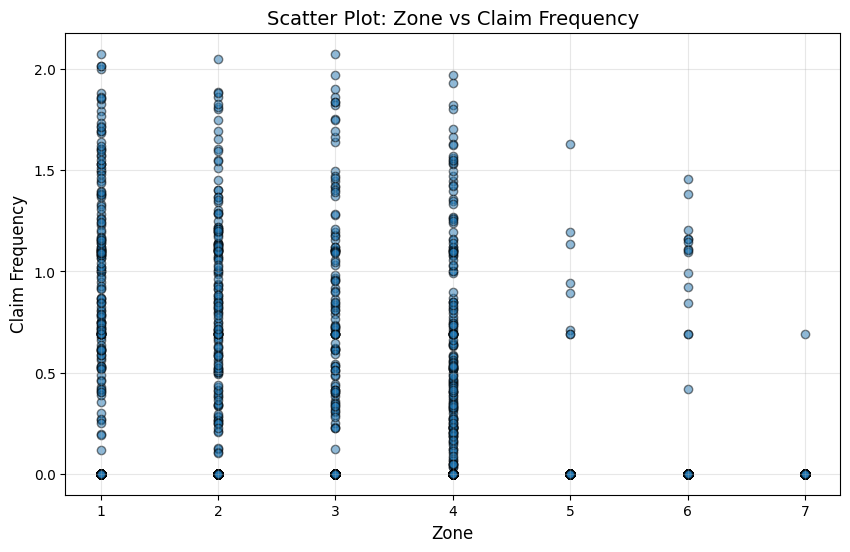

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(data['geo_zone'], data['claim_frequency'], alpha=0.5, edgecolor='k')
plt.title("Scatter Plot: Zone vs Claim Frequency", fontsize=14)
plt.xlabel("Zone", fontsize=12)
plt.ylabel("Claim Frequency", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

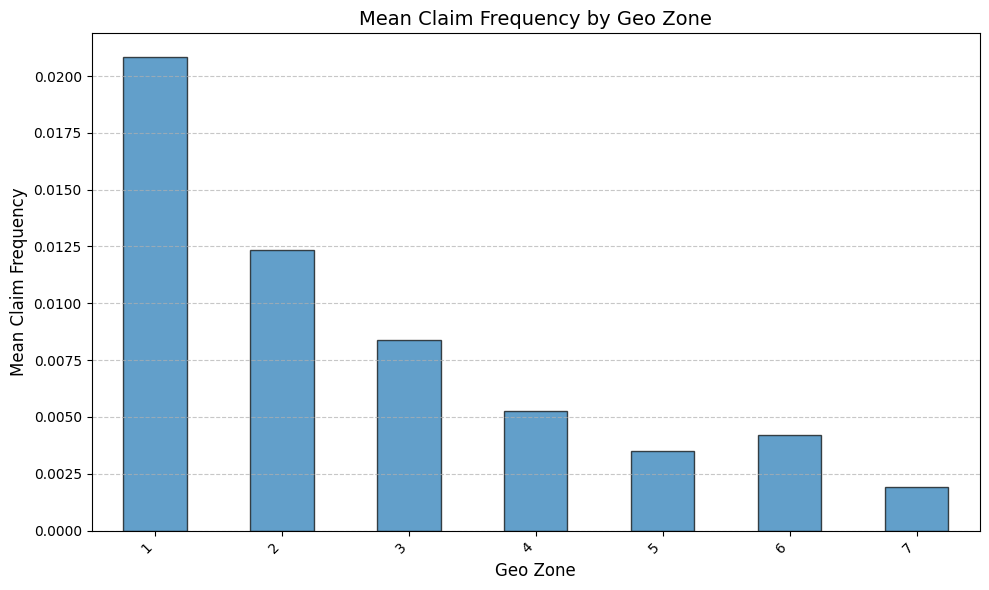

In [ ]:
import matplotlib.pyplot as plt

mean_claim_frequency = data.groupby('geo_zone')['claim_frequency'].mean()

plt.figure(figsize=(10, 6))
mean_claim_frequency.plot(kind='bar', alpha=0.7, edgecolor='black')

plt.title("Mean Claim Frequency by Geo Zone", fontsize=14)
plt.xlabel("Geo Zone", fontsize=12)
plt.ylabel("Mean Claim Frequency", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()

In [ ]:
geo_zone_one_hot = pd.get_dummies(data['geo_zone'], prefix='geo_zone')

# Concatenate one-hot encoded columns back to the original dataset
data = pd.concat([data, geo_zone_one_hot], axis=1)
data = data.applymap(lambda x: int(x) if isinstance(x, bool) else x)
data.head()

<ipython-input-231-83aa68b251e1>:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(lambda x: int(x) if isinstance(x, bool) else x)


,owner_gender,geo_zone,vehicle_classification,vehicle_age,claim_frequency,Age_Is_young,Age_Is_lower_middle,Age_Is_upper_middle,Age_Is_old,geo_zone_1,geo_zone_2,geo_zone_3,geo_zone_4,geo_zone_5,geo_zone_6,geo_zone_7
0,1,1,4,12,0.0,0,0,0,0,1,0,0,0,0,0,0
2,0,3,3,18,0.0,0,0,0,0,0,0,1,0,0,0,0
3,0,4,1,25,0.0,0,0,0,0,0,0,0,1,0,0,0
4,0,2,1,26,0.0,0,0,0,0,0,1,0,0,0,0,0
5,0,3,3,8,0.0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
data.drop(columns=['geo_zone'], inplace=True)
data.head()

,owner_gender,vehicle_classification,vehicle_age,claim_frequency,Age_Is_young,Age_Is_lower_middle,Age_Is_upper_middle,Age_Is_old,geo_zone_1,geo_zone_2,geo_zone_3,geo_zone_4,geo_zone_5,geo_zone_6,geo_zone_7
0,1,4,12,0.0,0,0,0,0,1,0,0,0,0,0,0
2,0,3,18,0.0,0,0,0,0,0,0,1,0,0,0,0
3,0,1,25,0.0,0,0,0,0,0,0,0,1,0,0,0
4,0,1,26,0.0,0,0,0,0,0,1,0,0,0,0,0
5,0,3,8,0.0,0,0,0,0,0,0,1,0,0,0,0


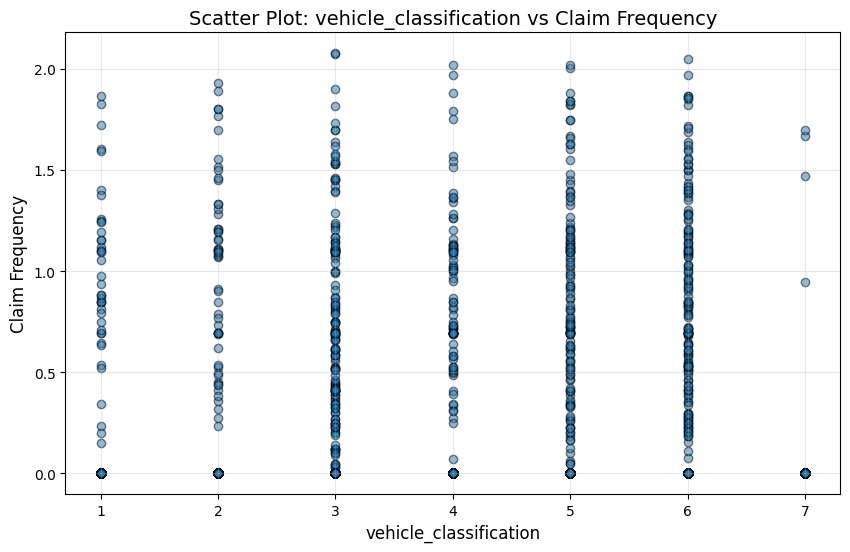

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(data['vehicle_classification'], data['claim_frequency'], alpha=0.5, edgecolor='k')
plt.title("Scatter Plot: vehicle_classification vs Claim Frequency", fontsize=14)
plt.xlabel("vehicle_classification", fontsize=12)
plt.ylabel("Claim Frequency", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

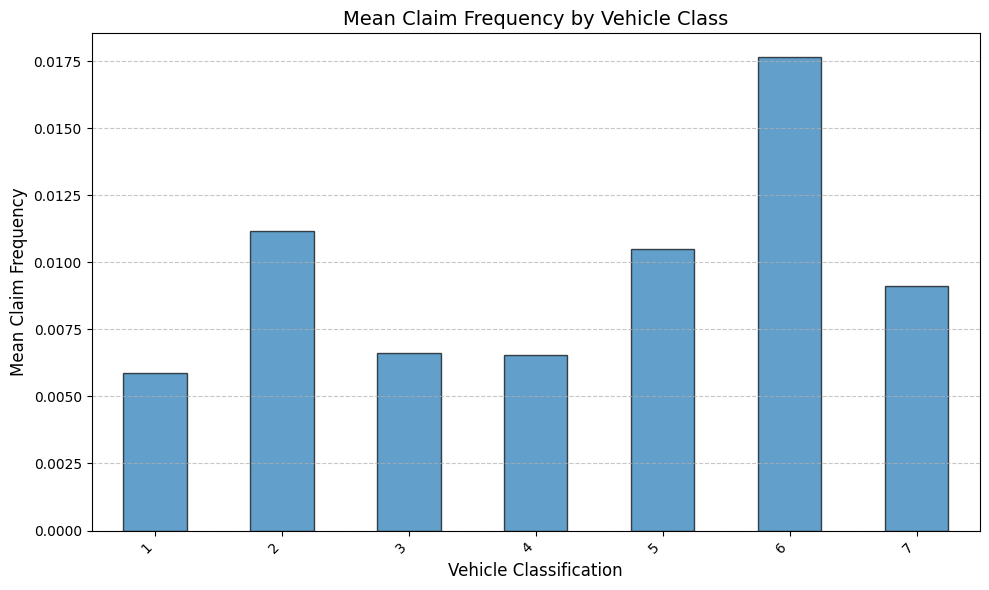

In [ ]:
mean_claim_frequency = data.groupby('vehicle_classification')['claim_frequency'].mean()

plt.figure(figsize=(10, 6))
mean_claim_frequency.plot(kind='bar', alpha=0.7, edgecolor='black')

plt.title("Mean Claim Frequency by Vehicle Class", fontsize=14)
plt.xlabel("Vehicle Classification", fontsize=12)
plt.ylabel("Mean Claim Frequency", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()

In [ ]:
geo_zone_one_hot = pd.get_dummies(data['vehicle_classification'], prefix='vehicle_classification')

# Concatenate one-hot encoded columns back to the original dataset
data = pd.concat([data, geo_zone_one_hot], axis=1)

data = data.applymap(lambda x: int(x) if isinstance(x, bool) else x)
data.head()

<ipython-input-235-e5d672c3d559>:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(lambda x: int(x) if isinstance(x, bool) else x)


,owner_gender,vehicle_classification,vehicle_age,claim_frequency,Age_Is_young,Age_Is_lower_middle,Age_Is_upper_middle,Age_Is_old,geo_zone_1,geo_zone_2,...,geo_zone_5,geo_zone_6,geo_zone_7,vehicle_classification_1,vehicle_classification_2,vehicle_classification_3,vehicle_classification_4,vehicle_classification_5,vehicle_classification_6,vehicle_classification_7
0,1,4,12,0.0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,0,3,18,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,1,25,0.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,1,26,0.0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
5,0,3,8,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
data.drop(columns=['vehicle_classification'], inplace=True)
data.head()

,owner_gender,vehicle_age,claim_frequency,Age_Is_young,Age_Is_lower_middle,Age_Is_upper_middle,Age_Is_old,geo_zone_1,geo_zone_2,geo_zone_3,...,geo_zone_5,geo_zone_6,geo_zone_7,vehicle_classification_1,vehicle_classification_2,vehicle_classification_3,vehicle_classification_4,vehicle_classification_5,vehicle_classification_6,vehicle_classification_7
0,1,12,0.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,18,0.0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,0,25,0.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,26,0.0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
5,0,8,0.0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


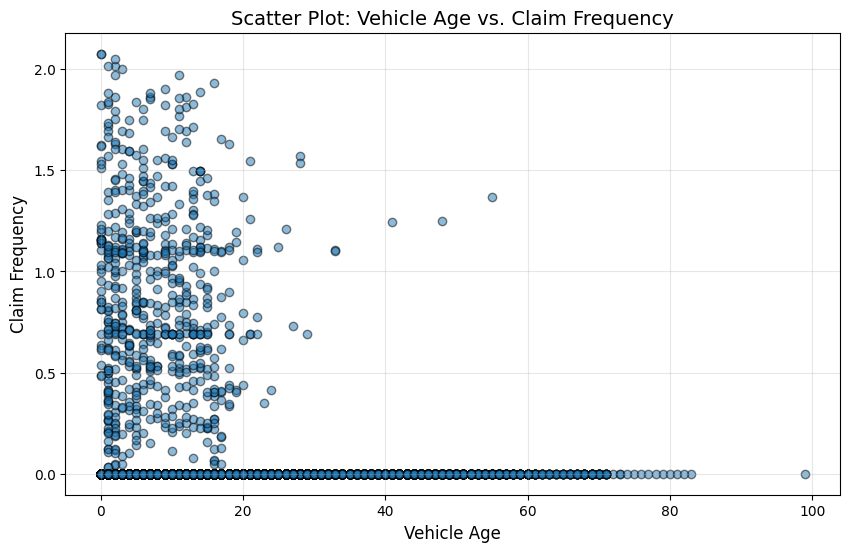

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(data['vehicle_age'], data['claim_frequency'], alpha=0.5, edgecolor='k')
plt.title("Scatter Plot: Vehicle Age vs. Claim Frequency", fontsize=14)
plt.xlabel("Vehicle Age", fontsize=12)
plt.ylabel("Claim Frequency", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

<ipython-input-238-8dde9e2950b2>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_bin_avg_claims = data.groupby('vehicle_age_bin')['claim_frequency'].mean()


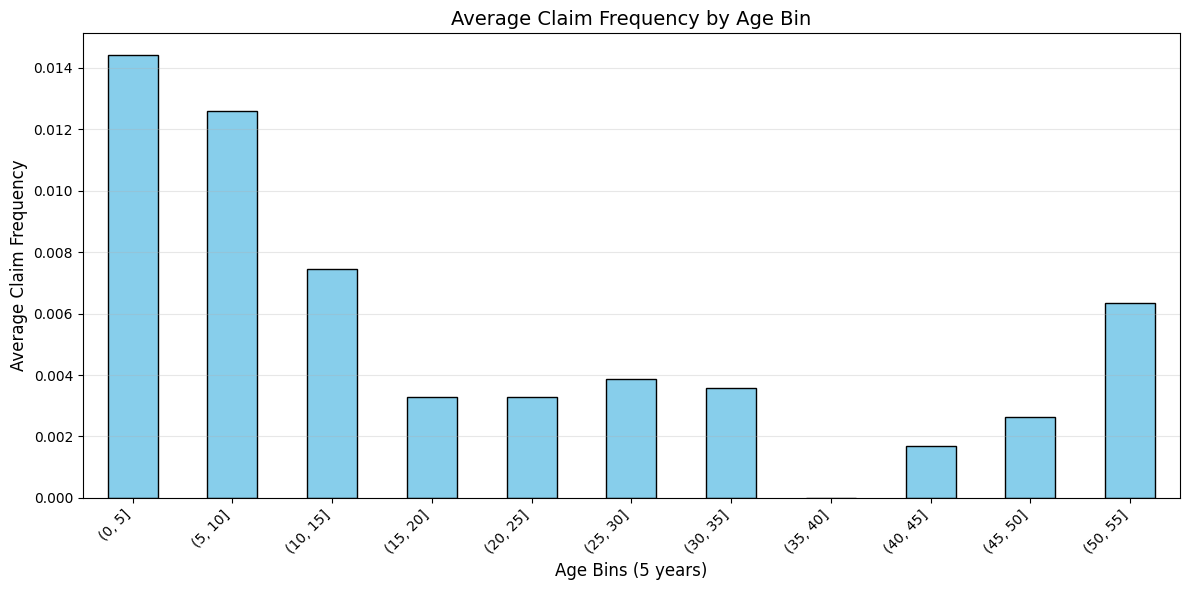

In [ ]:
data['vehicle_age_bin'] = pd.cut(data['vehicle_age'], bins=np.arange(0, 60, 5))

age_bin_avg_claims = data.groupby('vehicle_age_bin')['claim_frequency'].mean()

plt.figure(figsize=(12, 6))
age_bin_avg_claims.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Average Claim Frequency by Age Bin", fontsize=14)
plt.xlabel("Age Bins (5 years)", fontsize=12)
plt.ylabel("Average Claim Frequency", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
data=data.drop(columns=['vehicle_age_bin'])
data.columns

Index(['owner_gender', 'vehicle_age', 'claim_frequency', 'Age_Is_young',
       'Age_Is_lower_middle', 'Age_Is_upper_middle', 'Age_Is_old',
       'geo_zone_1', 'geo_zone_2', 'geo_zone_3', 'geo_zone_4', 'geo_zone_5',
       'geo_zone_6', 'geo_zone_7', 'vehicle_classification_1',
       'vehicle_classification_2', 'vehicle_classification_3',
       'vehicle_classification_4', 'vehicle_classification_5',
       'vehicle_classification_6', 'vehicle_classification_7'],
      dtype='object')

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X_all_features = data.drop(columns=['claim_frequency'])
y_all_features = data['claim_frequency']

# Split into training and test sets
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(
    X_all_features, y_all_features, test_size=0.2, random_state=42
)

# Fit the linear regression model
model_all_features = LinearRegression()
model_all_features.fit(X_train_all, y_train_all)

# Predict and evaluate
y_pred_all = model_all_features.predict(X_test_all)
mse_all = mean_squared_error(y_test_all, y_pred_all)
r2_all = r2_score(y_test_all, y_pred_all)

# Results
print("Linear Regression with All Features (Including Categorized Age):")
print(f"MSE: {mse_all}")
print(f"R²: {r2_all}")


Linear Regression with All Features (Including Categorized Age):
MSE: 0.010424090478021569
R²: 0.008135950047138185


Feature Importance:
                     Feature  Coefficient  Absolute_Coefficient
2               Age_Is_young     0.014893              0.014893
6                 geo_zone_1     0.012460              0.012460
12                geo_zone_7    -0.006925              0.006925
18  vehicle_classification_6     0.006149              0.006149
10                geo_zone_5    -0.005239              0.005239
7                 geo_zone_2     0.005049              0.005049
0               owner_gender     0.005009              0.005009
16  vehicle_classification_4    -0.003780              0.003780
11                geo_zone_6    -0.003532              0.003532
15  vehicle_classification_3    -0.003341              0.003341
9                 geo_zone_4    -0.002417              0.002417
14  vehicle_classification_2     0.002261              0.002261
19  vehicle_classification_7    -0.001800              0.001800
4        Age_Is_upper_middle    -0.001060              0.001060
3        Age_Is_lowe

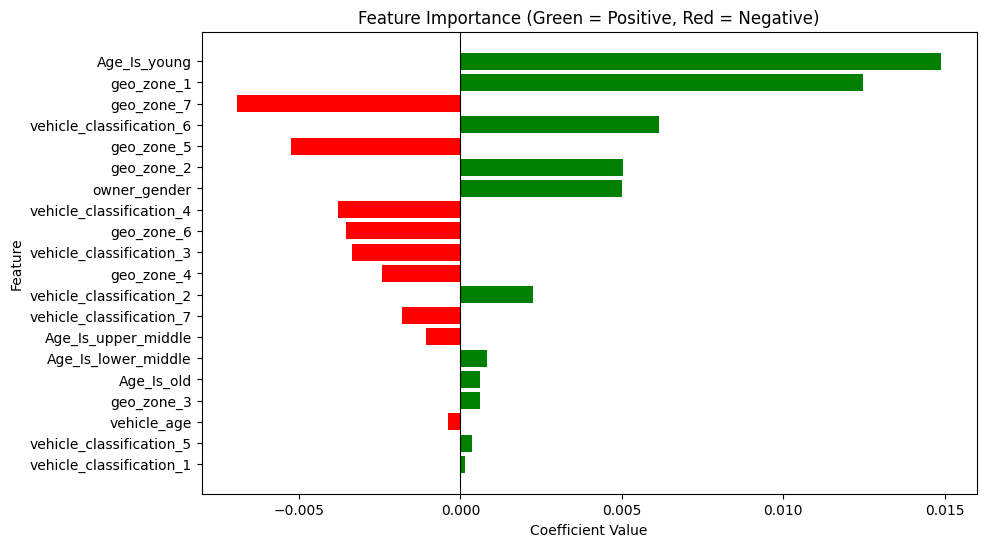

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Extract feature names
feature_names = X_all_features.columns

# Get coefficients from the trained model
coefficients = model_all_features.coef_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Absolute_Coefficient': np.abs(coefficients)
})

importance_df = importance_df.sort_values(by='Absolute_Coefficient', ascending=False)

print("Feature Importance:")
print(importance_df)

plt.figure(figsize=(10, 6))

colors = ['green' if coef > 0 else 'red' for coef in importance_df['Coefficient']]

plt.barh(importance_df['Feature'], importance_df['Coefficient'], color=colors)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance (Green = Positive, Red = Negative)')
plt.axvline(0, color='black', linewidth=0.8)
plt.gca().invert_yaxis()
plt.show()


In [ ]:
# Display basic info
print("Dataset Head:")
print(data.head())

# Check distribution of claim_frequency
print("\nClaim Frequency Distribution:")
print(data['claim_frequency'].value_counts())

# Separate majority (0s) and minority classes
majority_class = data[data['claim_frequency'] == 0]
minority_class = data[data['claim_frequency'] != 0]

# Undersample majority class to match the size of minority class
undersample_size = len(minority_class)
undersampled_majority = majority_class.sample(n=undersample_size, random_state=42)

# Combine undersampled majority and minority class
balanced_data = pd.concat([undersampled_majority, minority_class])

# Shuffle the dataset
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Display new distribution
print("\nBalanced Claim Frequency Distribution:")
print(balanced_data['claim_frequency'].value_counts())

# Split into features (X) and target (y)
X = balanced_data.drop('claim_frequency', axis=1)
y = balanced_data['claim_frequency']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nData prepared for modeling!")


Dataset Head:
   owner_gender  vehicle_age  claim_frequency  Age_Is_young  \
0             1           12              0.0             0   
2             0           18              0.0             0   
3             0           25              0.0             0   
4             0           26              0.0             0   
5             0            8              0.0             0   

   Age_Is_lower_middle  Age_Is_upper_middle  Age_Is_old  geo_zone_1  \
0                    0                    0           0           1   
2                    0                    0           0           0   
3                    0                    0           0           0   
4                    0                    0           0           0   
5                    0                    0           0           0   

   geo_zone_2  geo_zone_3  ...  geo_zone_5  geo_zone_6  geo_zone_7  \
0           0           0  ...           0           0           0   
2           0           1  ...          

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Fit the linear regression model
model_all_features = LinearRegression()
model_all_features.fit(X_train, y_train)

# Predict and evaluate
y_pred_all = model_all_features.predict(X_test)
mse_all = mean_squared_error(y_test, y_pred_all)
r2_all = r2_score(y_test, y_pred_all)

# Results
print("Linear Regression with All Features")
print(f"MSE: {mse_all}")
print(f"R²: {r2_all}")

Linear Regression with All Features
MSE: 0.22186021056224473
R²: 0.26731317303942903


Feature Importance:
                     Feature  Coefficient  Absolute_Coefficient
6                 geo_zone_1     0.235049              0.235049
2               Age_Is_young     0.206227              0.206227
10                geo_zone_5    -0.167854              0.167854
19  vehicle_classification_7     0.139051              0.139051
15  vehicle_classification_3    -0.120348              0.120348
4        Age_Is_upper_middle    -0.119898              0.119898
9                 geo_zone_4    -0.111939              0.111939
7                 geo_zone_2     0.108912              0.108912
18  vehicle_classification_6     0.093878              0.093878
13  vehicle_classification_1    -0.073182              0.073182
5                 Age_Is_old    -0.071575              0.071575
11                geo_zone_6    -0.068661              0.068661
16  vehicle_classification_4    -0.065884              0.065884
14  vehicle_classification_2     0.043279              0.043279
0               owne

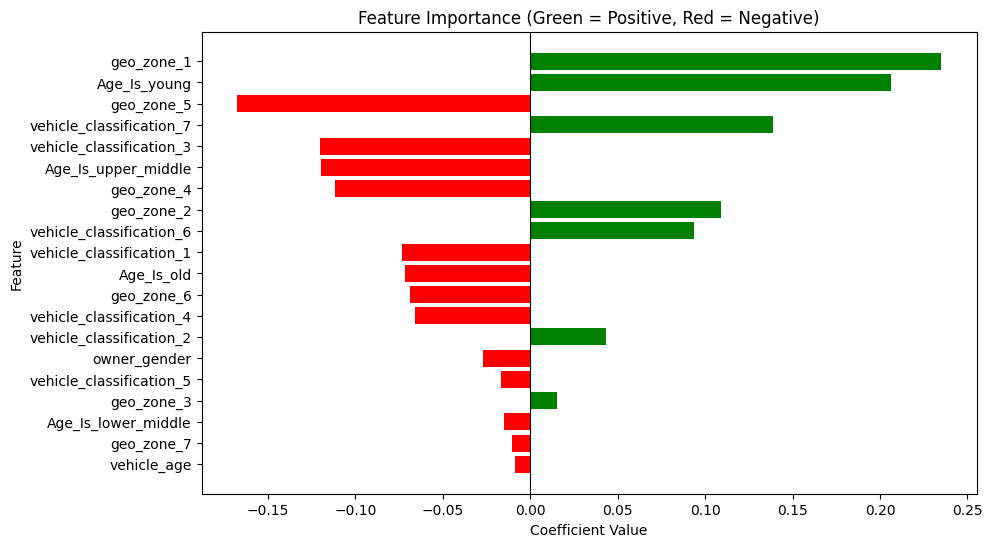

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Extract feature names
feature_names = X_all_features.columns

# Get coefficients from the trained model
coefficients = model_all_features.coef_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Absolute_Coefficient': np.abs(coefficients)
})

importance_df = importance_df.sort_values(by='Absolute_Coefficient', ascending=False)

print("Feature Importance:")
print(importance_df)

plt.figure(figsize=(10, 6))

colors = ['green' if coef > 0 else 'red' for coef in importance_df['Coefficient']]

plt.barh(importance_df['Feature'], importance_df['Coefficient'], color=colors)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance (Green = Positive, Red = Negative)')
plt.axvline(0, color='black', linewidth=0.8)
plt.gca().invert_yaxis()
plt.show()


In [ ]:
# Display basic info
print("Dataset Head:")
print(data.head())

# Check distribution of claim_frequency
print("\nClaim Frequency Distribution:")
print(data['claim_frequency'].value_counts())

# Separate majority (0s) and minority classes
majority_class = data[data['claim_frequency'] == 0]
minority_class = data[data['claim_frequency'] != 0]

# Undersample majority class to match the size of minority class
undersample_size = len(minority_class)
undersampled_majority = majority_class.sample(n=undersample_size, random_state=42)

# Combine undersampled majority and minority class
balanced_data = pd.concat([undersampled_majority, minority_class])

# Shuffle the dataset
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Display new distribution
print("\nBalanced Claim Frequency Distribution:")
print(balanced_data['claim_frequency'].value_counts())

# Split into features (X) and target (y)
X = balanced_data.drop(columns=['claim_frequency', 'owner_gender', 'vehicle_age'])
y = balanced_data['claim_frequency']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nData prepared for modeling!")


Dataset Head:
   owner_gender  vehicle_age  claim_frequency  Age_Is_young  \
0             1           12              0.0             0   
2             0           18              0.0             0   
3             0           25              0.0             0   
4             0           26              0.0             0   
5             0            8              0.0             0   

   Age_Is_lower_middle  Age_Is_upper_middle  Age_Is_old  geo_zone_1  \
0                    0                    0           0           1   
2                    0                    0           0           0   
3                    0                    0           0           0   
4                    0                    0           0           0   
5                    0                    0           0           0   

   geo_zone_2  geo_zone_3  ...  geo_zone_5  geo_zone_6  geo_zone_7  \
0           0           0  ...           0           0           0   
2           0           1  ...          

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Fit the linear regression model
model_all_features = LinearRegression()
model_all_features.fit(X_train, y_train)

# Predict and evaluate
y_pred_all = model_all_features.predict(X_test)
mse_all = mean_squared_error(y_test, y_pred_all)
r2_all = r2_score(y_test, y_pred_all)

# Results
print("Linear Regression without Owner Gender and Vehicle Age")
print(f"MSE: {mse_all}")
print(f"R²: {r2_all}")

Linear Regression without Owner Gender and Vehicle Age
MSE: 0.22704662657627359
R²: 0.2501851865339345
